# Raport z zadania regresja i klasyfikacja
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
from preprocessing import set_discrete_columns, remove_outliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/cardio_train.csv", sep=";", index_col=0)
df = remove_outliers(df, ["ap_hi", "ap_lo", "weight", "height"], 3)
pd.set_option("display.precision", 3)
df = remove_outliers(df, ["ap_hi", "ap_lo"], 5)
# df, groups = set_discrete_columns(df, ["age", "height", "weight", "ap_hi", "ap_lo"])
df.describe()

[(10864.0985, Interval(10785.085, 10943.112, closed='right')), (11015.6685, Interval(10943.112, 11088.225, closed='right')), (14208.140500000001, Interval(14135.584, 14280.697, closed='right')), (14353.253, Interval(14280.697, 14425.809, closed='right')), (14498.365, Interval(14425.809, 14570.921, closed='right')), (14643.4775, Interval(14570.921, 14716.034, closed='right')), (14788.59, Interval(14716.034, 14861.146, closed='right')), (14933.702000000001, Interval(14861.146, 15006.258, closed='right')), (15078.8145, Interval(15006.258, 15151.371, closed='right')), (15223.927, Interval(15151.371, 15296.483, closed='right')), (15369.039499999999, Interval(15296.483, 15441.596, closed='right')), (15514.152, Interval(15441.596, 15586.708, closed='right')), (15659.264, Interval(15586.708, 15731.82, closed='right')), (15804.3765, Interval(15731.82, 15876.933, closed='right')), (15949.489000000001, Interval(15876.933, 16022.045, closed='right')), (16094.600999999999, Interval(16022.045, 16167

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000
mean,59.232,1.347,3.055,6.334,3.692,3.124,1.362,1.223,0.087,0.053,0.804,0.492
std,17.008,0.476,1.156,2.209,1.163,0.930,0.677,0.569,0.282,0.224,0.397,0.500
min,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,47.000,1.000,2.000,5.000,3.000,3.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,61.000,1.000,3.000,6.000,3.000,3.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,72.000,2.000,4.000,8.000,5.000,4.000,1.000,1.000,0.000,0.000,1.000,1.000
max,88.000,2.000,6.000,13.000,9.000,7.000,3.000,3.000,1.000,1.000,1.000,1.000


In [3]:
groups

{'age': {0: '(10785.085, 10943.112]',
  1: '(10943.112, 11088.225]',
  2: '(14135.584, 14280.697]',
  3: '(14280.697, 14425.809]',
  4: '(14425.809, 14570.921]',
  5: '(14570.921, 14716.034]',
  6: '(14716.034, 14861.146]',
  7: '(14861.146, 15006.258]',
  8: '(15006.258, 15151.371]',
  9: '(15151.371, 15296.483]',
  10: '(15296.483, 15441.596]',
  11: '(15441.596, 15586.708]',
  12: '(15586.708, 15731.82]',
  13: '(15731.82, 15876.933]',
  14: '(15876.933, 16022.045]',
  15: '(16022.045, 16167.157]',
  16: '(16167.157, 16312.27]',
  17: '(16312.27, 16457.382]',
  18: '(16457.382, 16602.494]',
  19: '(16602.494, 16747.607]',
  20: '(16747.607, 16892.719]',
  21: '(16892.719, 17037.831]',
  22: '(17037.831, 17182.944]',
  23: '(17182.944, 17328.056]',
  24: '(17328.056, 17473.169]',
  25: '(17473.169, 17618.281]',
  26: '(17618.281, 17763.393]',
  27: '(17763.393, 17908.506]',
  28: '(17908.506, 18053.618]',
  29: '(18053.618, 18198.73]',
  30: '(18198.73, 18343.843]',
  31: '(18343.843

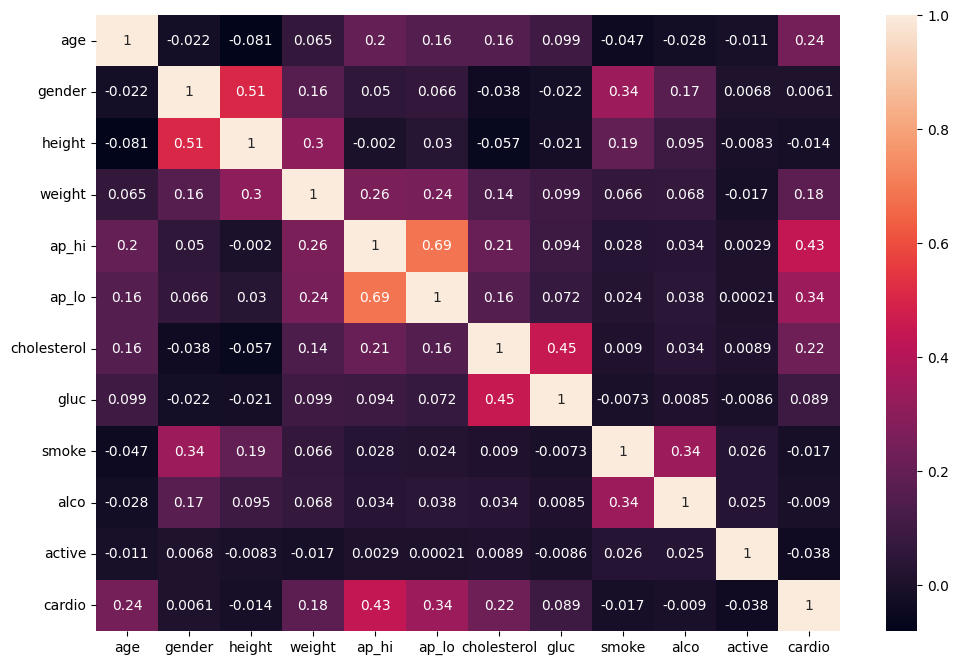

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()